In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.shape

(5000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.describe().round(2)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,30.03,70.06,20.14,30.22,26.41,10.01,1.50,8.43,497.42
std,6.72,15.86,24.55,27.35,8.90,6.75,0.55,3.61,152.75
min,13.40,36.00,0.00,-0.20,7.40,-6.20,0.65,2.50,188.00
25%,25.10,58.30,4.60,12.30,20.10,5.10,1.03,5.40,381.00
50%,29.00,69.80,12.00,21.70,25.30,8.00,1.41,7.90,494.00
75%,34.00,80.30,26.10,38.10,31.90,13.72,1.84,11.10,600.00
max,58.60,128.10,295.00,315.80,64.90,44.90,3.72,25.80,957.00


In [6]:
num_cols = df.select_dtypes(exclude = object)
num_cols.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303


In [7]:
cat_col = df.select_dtypes(include = object)
cat_col.head()

,Air Quality
0,Moderate
1,Moderate
2,Moderate
3,Good
4,Good


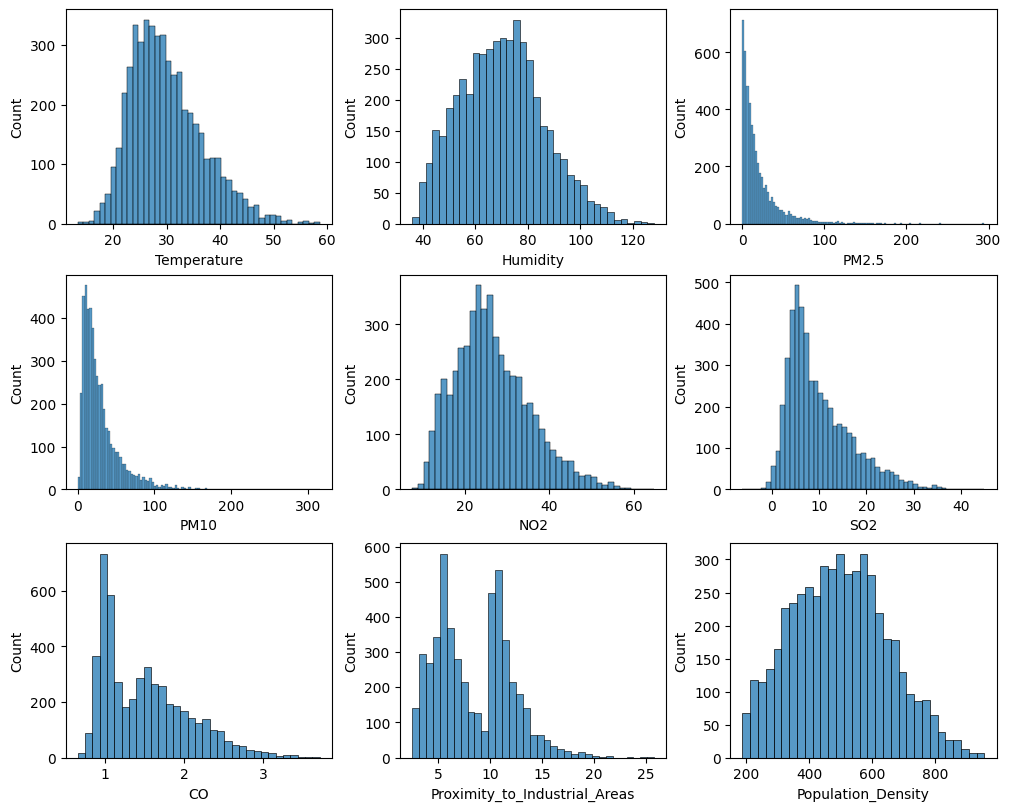

In [8]:
# EDA - Univariate analysis (Numerical features)

fig, axs = plt.subplots(3, 3, figsize = (10,8), constrained_layout = True)
axs = axs.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data = df, x = col, ax = axs[i])

plt.show()

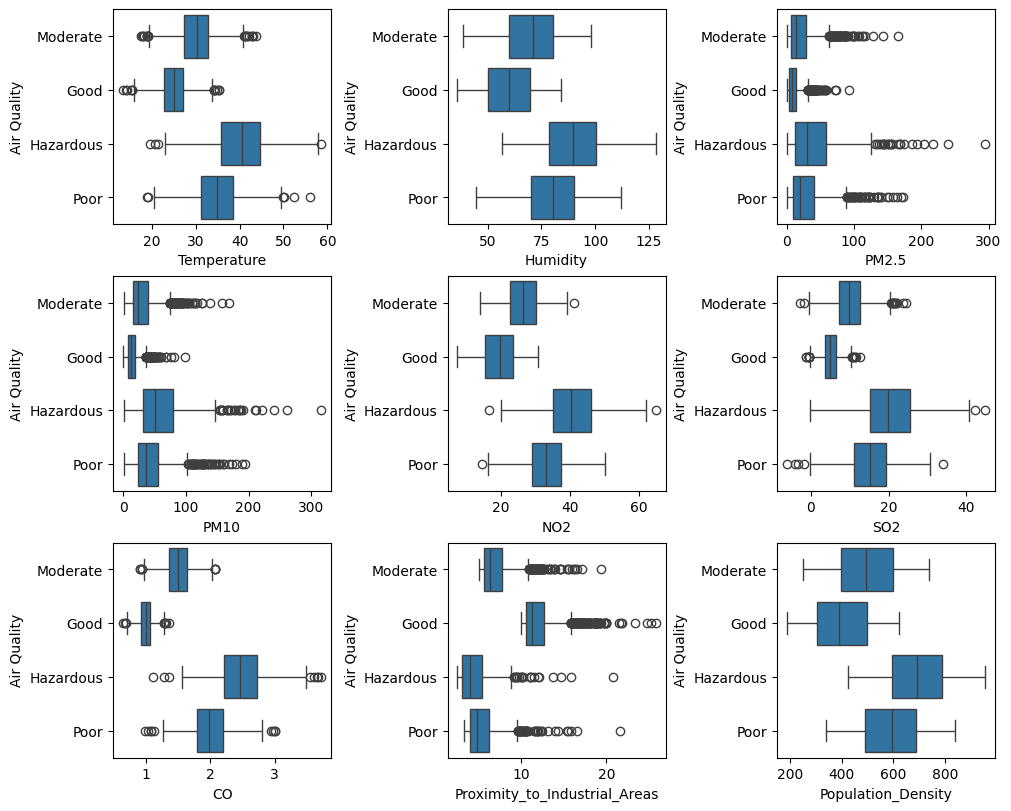

In [9]:
# Bivariate analysis Numerical vs Categorical (Target variable)

fig, axs = plt.subplots(3,3, figsize = (10,8), constrained_layout = True)
axs = axs.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data = df, x = col, y = 'Air Quality', ax = axs[i])

plt.show()

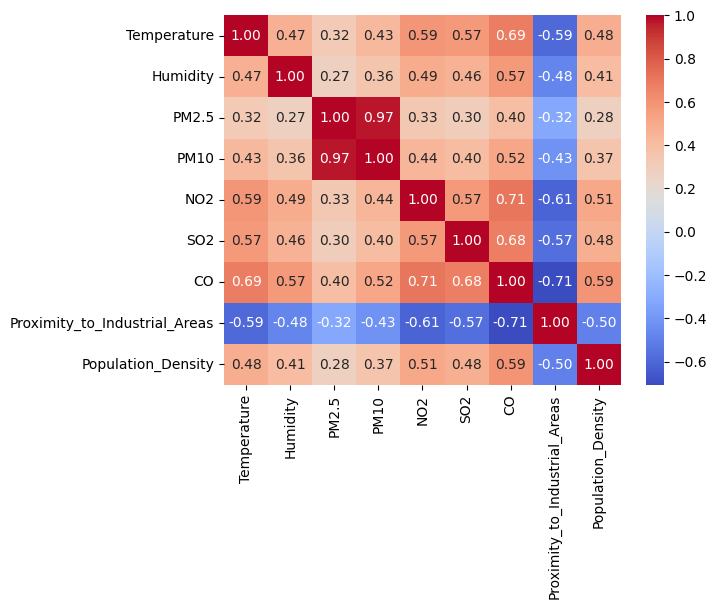

In [10]:
sns.heatmap(num_cols.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.show()

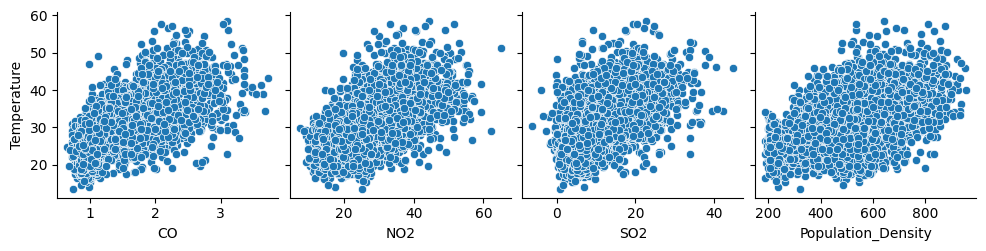

In [11]:
sns.pairplot(data = df, 
             x_vars = ['CO', 'NO2', 'SO2', 'Population_Density'],
             y_vars = ['Temperature'])
plt.show()

In [12]:
import sklearn

print(sklearn.__version__)

1.5.1


In [13]:
# Define the predictors(X) and target variable (y)

X = df.drop(columns = 'Air Quality')
y = df['Air Quality']

In [14]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3500, 9) (3500,)
(1500, 9) (1500,)


In [15]:
X_train.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
dtype: object

In [16]:
# Standardizing the numerical columns

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train_transformed = pd.DataFrame(std_scaler.fit_transform(X_train),
                                   columns = std_scaler.get_feature_names_out(),
                                   index = X_train.index)

X_train_transformed.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
2858,-1.435522,-1.408212,-0.758278,-0.863212,-0.981012,-0.517924,-0.777810,1.331996,-0.455729
1559,-0.131347,-0.993517,-0.619014,-0.467256,1.294245,1.200350,0.450871,-0.280878,0.296483
1441,3.331463,0.294550,-0.188559,-0.207056,0.370626,1.363289,0.505886,-1.337589,0.114914
2179,-0.386186,-0.823869,-0.521950,-0.516279,-0.890903,-1.377061,-0.759471,2.694596,-0.591906
1390,1.202809,1.683150,1.693623,1.889625,1.587100,2.118737,1.661213,-0.976083,2.371551


In [17]:
X_train_transformed.describe().round(2)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.50,-2.12,-0.82,-1.11,-2.02,-2.41,-1.57,-1.64,-2.00
25%,-0.73,-0.75,-0.64,-0.65,-0.71,-0.73,-0.85,-0.84,-0.76
50%,-0.13,-0.01,-0.33,-0.31,-0.12,-0.29,-0.15,-0.14,-0.02
75%,0.60,0.64,0.23,0.28,0.63,0.55,0.63,0.72,0.68
max,4.28,3.45,11.63,10.80,4.34,5.16,4.06,4.67,2.98


In [18]:
# Standardizing the numerical columns (X_test)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_test_transformed = pd.DataFrame(std_scaler.fit_transform(X_test),
                                   columns = std_scaler.get_feature_names_out(),
                                   index = X_test.index)

X_test_transformed.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
398,0.363157,0.621709,0.548370,0.696623,1.162265,1.672295,0.490433,0.147860,0.973153
3833,-0.163780,0.418175,0.222043,0.356621,0.121123,-0.745145,0.198161,0.641825,0.269611
4836,0.172875,-0.663103,-0.297802,-0.227223,-0.897629,-0.166739,0.362564,-0.949840,0.879348
4572,-0.193054,-1.591729,1.322446,1.129354,0.423390,-0.418865,-0.130646,-0.236335,1.227769
636,-0.954186,-0.186069,1.288295,0.888948,-0.617752,-0.433696,-1.025731,0.751595,-0.896259


In [19]:
# Training and testing phase (Decision Tree)

import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)
y_test_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.924
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       615
   Hazardous       0.80      0.81      0.81       158
    Moderate       0.93      0.95      0.94       445
        Poor       0.82      0.79      0.80       282

    accuracy                           0.92      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.92      0.92      0.92      1500

Confusion Matrix:
 [[612   0   3   0]
 [  0 128   1  29]
 [  1   0 423  21]
 [  0  32  27 223]]
Execution time: 0.5064730644226074 seconds


In [20]:
# Training and testing phase (Naive Bayes)

import time
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)
y_test_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.932
Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      1.00       615
   Hazardous       0.92      0.73      0.81       158
    Moderate       0.93      0.96      0.95       445
        Poor       0.82      0.85      0.83       282

    accuracy                           0.93      1500
   macro avg       0.91      0.89      0.90      1500
weighted avg       0.93      0.93      0.93      1500

Confusion Matrix:
 [[615   0   0   0]
 [  0 115   0  43]
 [  6   0 428  11]
 [  0  10  32 240]]
Execution time: 0.22534418106079102 seconds


In [21]:
# Training and testing phase
import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_test_pred = model.predict(X_test_transformed)

print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion  Matrix:\n", confusion_matrix(y_test, y_test_pred))
      
end_time = time.time()
print(f"Execution TIme: {end_time - start_time} seconds")

Accuracy Score: 0.9506666666666667
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       615
   Hazardous       0.89      0.80      0.84       158
    Moderate       0.96      0.98      0.97       445
        Poor       0.86      0.89      0.87       282

    accuracy                           0.95      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.95      0.95      0.95      1500

Confusion  Matrix:
 [[613   0   2   0]
 [  0 126   0  32]
 [  0   0 436   9]
 [  0  16  15 251]]
Execution TIme: 1.2262964248657227 seconds
